In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['font.sans-serif']=['simhei']
plt.rcParams['axes.unicode_minus']=False
import warnings
warnings.filterwarnings('ignore')
data = pd.read_csv('Desktop/lagou.csv')
print('Shape:',data.shape)
data.head()

Shape: (367, 9)


web-scraper-order                              web-scraper-start-url  \
0    1587371062-309  https://www.lagou.com/shanghai-zhaopin/shujufe...   
1    1587371062-310  https://www.lagou.com/shanghai-zhaopin/shujufe...   
2    1587371062-311  https://www.lagou.com/shanghai-zhaopin/shujufe...   
3    1587371062-312  https://www.lagou.com/shanghai-zhaopin/shujufe...   
4    1587371062-313  https://www.lagou.com/shanghai-zhaopin/shujufe...   

           title region                                             salary  \
0      数据分析师（实习）    静安区  3k-6k\n                                    经验应...   
1  3221AP-数据分析经理   浦东新区  25k-40k\n                                    经...   
2   12314E-数据分析岗   浦东新区  8k-10k\n                                    经验...   
3       数据分析师实习生    五角场  3k-6k\n                                    经验应...   
4         数据分析专员    四平路  15k-25k\n                                    经...   

     company      industry    stage      size  
0       一面数据   移动互联网,数据服务       A轮    50-150人  
1    平安健康互联网  移动互联网,医疗丨健康     上市公司    2000人以上  
2       平安金服           金融     上市公司    2000人以上  
3       脉策数据    数据服务,企业服务       A轮    50-150人  
4  掌门1对1在线教育     移动互联网,教育    D轮及以上    2000人以上

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   web-scraper-order      367 non-null    object
 1   web-scraper-start-url  367 non-null    object
 2   title                  367 non-null    object
 3   region                 367 non-null    object
 4   salary                 367 non-null    object
 5   company                367 non-null    object
 6   industry               367 non-null    object
 7   stage                  367 non-null    object
 8   size                   367 non-null    object
dtypes: object(9)
memory usage: 25.9+ KB


In [ ]:
#数据清洗
##salary, experience & degree
###分割步骤：
#1.观察‘salary(原)’格式,以'\n'作为分隔符，将字符串分成‘salary（新）’和‘experience & degree'，提取后者成新的一列‘split’  
#2.观察‘split’格式，以‘/’作为分隔符，将字符串分成‘experience’和‘degree’并添加进dataframe中  
#3.返回到步骤1中提取‘salary（新）’，并覆盖‘salary（原）’  

In [8]:
data.head()

web-scraper-order                              web-scraper-start-url  \
0    1587371062-309  https://www.lagou.com/shanghai-zhaopin/shujufe...   
1    1587371062-310  https://www.lagou.com/shanghai-zhaopin/shujufe...   
2    1587371062-311  https://www.lagou.com/shanghai-zhaopin/shujufe...   
3    1587371062-312  https://www.lagou.com/shanghai-zhaopin/shujufe...   
4    1587371062-313  https://www.lagou.com/shanghai-zhaopin/shujufe...   

           title region                                             salary  \
0      数据分析师（实习）    静安区  3k-6k\n                                    经验应...   
1  3221AP-数据分析经理   浦东新区  25k-40k\n                                    经...   
2   12314E-数据分析岗   浦东新区  8k-10k\n                                    经验...   
3       数据分析师实习生    五角场  3k-6k\n                                    经验应...   
4         数据分析专员    四平路  15k-25k\n                                    经...   

     company      industry    stage      size  
0       一面数据   移动互联网,数据服务       A轮    50-150人  
1    平安健康互联网  移动互联网,医疗丨健康     上市公司    2000人以上  
2       平安金服           金融     上市公司    2000人以上  
3       脉策数据    数据服务,企业服务       A轮    50-150人  
4  掌门1对1在线教育     移动互联网,教育    D轮及以上    2000人以上

In [9]:
# 步骤1
print(f"salary格式: {data['salary'].iloc[0]}")
data['split'] = data['salary'].str.split('\n').str[1]

salary格式: 3k-6k
                                    经验应届毕业生 / 本科


In [10]:
# 步骤2
print(f"split格式: {data['split'].iloc[0]}")
data['experience'] = data['split'].str.split('/').str[0]
data['degree'] = data['split'].str.split('/').str[1]

# 删除空格
data['experience'] = data['experience'].str.replace(' ','')
data['degree'] = data['degree'].str.replace(' ','')

split格式:                                     经验应届毕业生 / 本科


In [11]:
# 步骤3
data['salary'] = data['salary'].str.split('\n').str[0]
data.head(1)

web-scraper-order                              web-scraper-start-url  \
0    1587371062-309  https://www.lagou.com/shanghai-zhaopin/shujufe...   

       title region salary company     industry stage      size  \
0  数据分析师（实习）    静安区  3k-6k    一面数据  移动互联网,数据服务    A轮    50-150人   

                                              split experience degree  
0                                      经验应届毕业生 / 本科    经验应届毕业生     本科

In [12]:
#salary中包含数字信息，需要进行提取，提取为平均薪资,并将其从字符串改成整数型
print(f"salary格式: {data['salary'].iloc[0]}")

salary格式: 3k-6k


In [13]:
data['salary'] = data['salary'].str.replace('k','')
data['salary'] = data['salary'].str.replace('K','')
data['salary_low'] = data['salary'].str.split('-').str[0].astype(int)
data['salary_high'] = data['salary'].str.split('-').str[1].astype(int)
data['average_salary'] = (data['salary_low']+data['salary_high'])/2
data.head(1)

web-scraper-order                              web-scraper-start-url  \
0    1587371062-309  https://www.lagou.com/shanghai-zhaopin/shujufe...   

       title region salary company     industry stage      size  \
0  数据分析师（实习）    静安区    3-6    一面数据  移动互联网,数据服务    A轮    50-150人   

                                              split experience degree  \
0                                      经验应届毕业生 / 本科    经验应届毕业生     本科   

   salary_low  salary_high  average_salary  
0           3            6             4.5

In [ ]:
#观察industry数据，发现每家公司都涵盖到1-2个领域，可以以‘，’拆分成‘industry_1’和‘industry_2'。无‘industry_2'的观测值填无

In [14]:
data['industry'].iloc[0:6]

0     移动互联网,数据服务 
1    移动互联网,医疗丨健康 
2             金融 
3      数据服务,企业服务 
4       移动互联网,教育 
5          文娱丨内容 
Name: industry, dtype: object

In [15]:
data['industry'] = data['industry'].str.replace('、',',')
data['industry'] = data['industry'].str.replace(' ','')
data['industry_1'] = data['industry'].str.split(',').str[0]
data['industry_2'] = data['industry'].str.split(',').str[1].fillna('无')
data.head(1)

web-scraper-order                              web-scraper-start-url  \
0    1587371062-309  https://www.lagou.com/shanghai-zhaopin/shujufe...   

       title region salary company    industry stage      size  \
0  数据分析师（实习）    静安区    3-6    一面数据  移动互联网,数据服务   A轮    50-150人   

                                              split experience degree  \
0                                      经验应届毕业生 / 本科    经验应届毕业生     本科   

   salary_low  salary_high  average_salary industry_1 industry_2  
0           3            6             4.5      移动互联网       数据服务

In [ ]:
#region进行重分组，以区级划分 (*注：有部分横跨多个区的情况，只选择其中一个区进行记录，因此可能存在偏差)

In [ ]:
jiading = ['南翔','安亭']
baoshan = ['庙行','淞南']
xuhui = ['徐家汇','漕宝路','漕河泾','田林','虹梅路','龙华']
putuo = ['曹杨','长寿路','长征']
yangpu = ['东外滩','五角场','周家嘴路','复旦大学','平凉路','延吉','长阳路','鞍山']
songjiang = ['九亭']
pudong = ['东方路','八佰伴','六里','北蔡','南码头','唐镇','塘桥','张江','梅园','洋泾','潍坊','花木','金桥','陆家嘴']
hongkou = ['北外滩','四川北路','四平路']
changning = ['中山公园','北新泾','古北','天山路','镇宁路']
minhang = ['七宝','万源城','华漕','莘庄','虹桥','龙柏']
zhabei = ['汶水路']
qingpu = ['重固']
jingan = ['南京西路','同乐坊','新闸路','曹家渡','闸北公园','静安寺']
huangpu = ['五里桥','人民广场','南京东路','城隍庙','新天地','豫园']

In [ ]:
for x in jiading:
    data['region'] = data['region'].replace({x:'嘉定区'})
for x in baoshan:
    data['region'] = data['region'].replace({x:'宝山区'})
for x in xuhui:
    data['region'] = data['region'].replace({x:'徐汇区'})
for x in putuo:
    data['region'] = data['region'].replace({x:'普陀区'})
for x in yangpu:
    data['region'] = data['region'].replace({x:'杨浦区'})
for x in songjiang:
    data['region'] = data['region'].replace({x:'松江区'})
for x in pudong:
    data['region'] = data['region'].replace({x:'浦东新区'})
for x in hongkou:
    data['region'] = data['region'].replace({x:'虹口区'})
for x in changning:
    data['region'] = data['region'].replace({x:'长宁区'})
for x in minhang:
    data['region'] = data['region'].replace({x:'闵行区'})
for x in zhabei:
    data['region'] = data['region'].replace({x:'闸北区'})
for x in qingpu:
    data['region'] = data['region'].replace({x:'青浦区'})
for x in jingan:
    data['region'] = data['region'].replace({x:'静安区'})
for x in huangpu:
    data['region'] = data['region'].replace({x:'黄浦区'})

In [18]:
data['region'].value_counts()

张江      37
浦东新区    25
长宁区     22
闵行区     21
徐汇区     18
        ..
北蔡       1
南京西路     1
淞南       1
龙柏       1
梅园       1
Name: region, Length: 77, dtype: int64

In [ ]:
#薪酬分析

In [20]:
data['average_salary'].describe()

count    367.000000
mean      19.671662
std       10.413931
min        1.500000
25%       12.500000
50%       19.500000
75%       27.500000
max       60.000000
Name: average_salary, dtype: float64

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


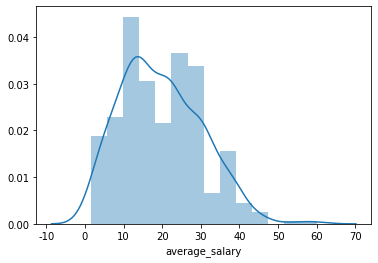

In [21]:
sns.distplot(data['average_salary'])

In [22]:
#工作经验
data['experience'].value_counts().sort_values(ascending=False)

经验3-5年     132
经验1-3年     108
经验5-10年     54
经验应届毕业生     37
经验不限        31
经验1年以下       4
经验10年以上      1
Name: experience, dtype: int64

[Text(0, 0.5, 'Counts'), Text(0.5, 0, 'Experience')]

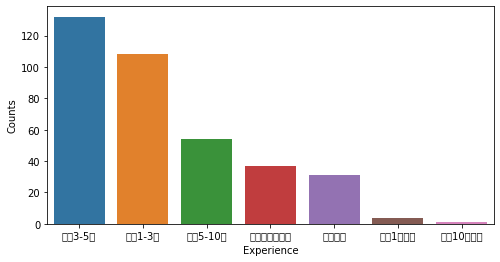

In [23]:
order = data.groupby('experience')['experience'].count().sort_values(ascending=False).index.values
plt.figure(figsize=(8,4))
ax = sns.countplot(x='experience',data=data,order=order)
ax.set(xlabel='Experience', ylabel='Counts')

[Text(0, 0.5, 'Salary'), Text(0.5, 0, 'Experience')]

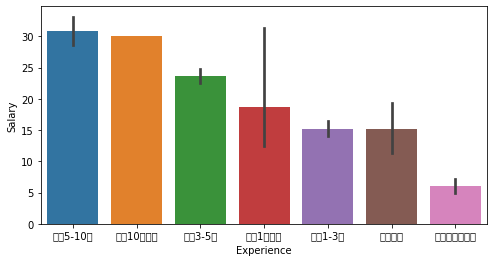

In [24]:
order = data.groupby('experience')['average_salary'].mean().sort_values(ascending=False).index.values
plt.figure(figsize=(8,4))
ax = sns.barplot(x='experience',y='average_salary',data=data,order=order)
ax.set(xlabel='Experience', ylabel='Salary')

In [25]:
#学历要求
data['degree'].value_counts().sort_values(ascending=False)

本科    312
不限     24
硕士     21
大专     10
Name: degree, dtype: int64

In [26]:
order = data.groupby('degree')['degree'].count().sort_values(ascending=False).index.values
# plt.figure(figsize=(8,4))
ax = sns.countplot(x='degree',data=data,order=order)
ax.set(xlabel='degree', ylabel='Counts')

[Text(0, 0.5, 'Counts'), Text(0.5, 0, 'degree')]

In [27]:
order = data.groupby('degree')['average_salary'].sum().sort_values(ascending=False).index.values
plt.figure(figsize=(8,4))
ax = sns.barplot(x='degree',y='average_salary',data=data,order=order)
ax.set(xlabel='degree', ylabel='Salary')

[Text(0, 0.5, 'Salary'), Text(0.5, 0, 'degree')]

In [28]:
exp_deg = pd.DataFrame(data.groupby(['degree','experience'])['average_salary'].mean()).sort_values(by='average_salary',ascending=False).reset_index()
exp_deg

degree experience  average_salary
0      硕士    经验5-10年       33.750000
1      本科    经验5-10年       30.908163
2      本科    经验10年以上       30.000000
3      不限    经验5-10年       29.166667
4      本科     经验3-5年       23.934426
5      硕士     经验3-5年       23.333333
6      本科     经验1年以下       18.750000
7      不限     经验3-5年       18.700000
8      不限     经验1-3年       18.500000
9      硕士     经验1-3年       17.900000
10     本科       经验不限       16.380952
11     硕士       经验不限       15.300000
12     本科     经验1-3年       15.177419
13     大专     经验3-5年       15.000000
14     不限       经验不限       11.166667
15     硕士    经验应届毕业生       10.166667
16     大专     经验1-3年        9.500000
17     大专       经验不限        7.500000
18     本科    经验应届毕业生        5.727273
19     不限    经验应届毕业生        4.000000
20     大专    经验应届毕业生        2.500000

In [ ]:
#企业类型（融资阶段，公司规模，行业领域）

In [29]:
# 融资阶段
data['stage'].value_counts().sort_values(ascending=False)

 上市公司      99
 不需要融资     65
 D轮及以上     47
 C轮        45
 A轮        38
 B轮        37
 未融资       31
 天使轮        5
Name: stage, dtype: int64

In [30]:
order = data.groupby('stage')['stage'].count().sort_values(ascending=False).index.values
ax = sns.countplot(x='stage',data=data,order=order)
ax.set(xlabel='stage', ylabel='counts')

[Text(0, 0.5, 'counts'), Text(0.5, 0, 'stage')]

In [31]:
# 公司规模
data['size'].value_counts().sort_values(ascending=False)

 2000人以上      132
 500-2000人     79
 150-500人      69
 50-150人       55
 15-50人        23
 少于15人          9
Name: size, dtype: int64

In [32]:
order = data.groupby('size')['size'].count().sort_values(ascending=False).index.values
ax = sns.countplot(x='size',data=data,order=order)
ax.set(xlabel='size', ylabel='counts')

[Text(0, 0.5, 'counts'), Text(0.5, 0, 'size')]

In [ ]:
# 行业领域
ind_1 = pd.DataFrame(data['industry_1'].value_counts()).reset_index()
ind_1 = ind_1.rename(columns={'index':'industry','industry_1':'counts'})
ind_2 = pd.DataFrame(data['industry_2'].value_counts()).reset_index()
ind_2 = ind_2.rename(columns={'index':'industry','industry_2':'counts'})
industry = ind_1.merge(ind_2,on = 'industry',how = 'outer').fillna(0)
industry['counts']= industry['counts_x']+industry['counts_y']
industry = industry.drop(columns=['counts_x','counts_y'])
industry = industry.drop(index = 22)
industry = industry.sort_values(by = 'counts',axis = 0,ascending = False)

In [ ]:
plt.figure(figsize=(20,4))
ax = sns.barplot(x='industry',y='counts',data=industry)
ax.set(xlabel='industry', ylabel='counts')

In [34]:
#region
plt.figure(figsize=(10,4))
order = data.groupby('region')['region'].count().sort_values(ascending=False).index.values
sns.countplot(x='region',data=data, order=order)